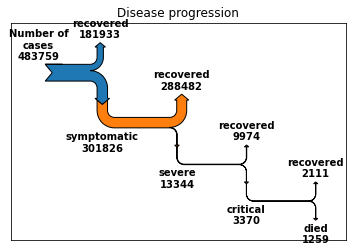

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.sankey import Sankey

# Get infection data from model run
filepath = '/Users/robbiework/eclipse-workspace/Disease-Modelling-SSA/java/WorldBankCovid19/' \
           'single_run_infections_2022-07-05T15:20:25.159342.txt'
# Choose a save path for the graph
savepath = '/Users/robbiework/PycharmProjects/spacialEpidemiologyAnalysis/plots/model_sankey_flow.png'

# read output file via pandas
data = pd.read_csv(filepath, sep="\t")

# Get a list of people who were contagious 
contagious_index = data.loc[data['ContagiousAt'] != '-'].index

# Found how many people were contagious
contagious_count = len(contagious_index)

# Find who recovered from COVID at the contagious stage and 
recovered_at_contagious_index = data.loc[
    contagious_index.intersection(
        data.loc[data['SymptomaticAt'] == '-'].index
    )
].index

# Find how many recovered from covid before becoming symptomatic 
recovered_at_contagious_count = len(recovered_at_contagious_index)

# Find who developed symptomatic COVID 
symptomatic_index = data.loc[data['SymptomaticAt'] != '-'].index

# Find how many people had symptomatic covid
symptomatic_count = len(symptomatic_index)

# Find who recovered from COVID at the symptomatic stage (those who are symptomatic but don't have a severe infection 
# date set)
recovered_at_symptomatic_index = data.loc[
    symptomatic_index.intersection(
        data.loc[data['SevereAt'] == '-'].index
    )
].index

# Find how many people recovered at the symptomatic stage
recovered_at_symptomatic_count = len(recovered_at_symptomatic_index)

# Find who developed severe COVID 
severe_index = data.loc[data['SevereAt'] != '-'].index

# Find how many had severe COVID
severe_count = len(severe_index)

# Find who recovered from COVID at the severe stage (thos who have a severe infection but don't have a critical 
# date set)
recovered_at_severe_index = data.loc[
    severe_index.intersection(
        data.loc[data['CriticalAt'] == '-'].index
    )
].index

# Find how many recovered from a severe infection
recovered_at_severe_count = len(recovered_at_severe_index)

# Find who developed critical COVID 
critical_index = data.loc[data['CriticalAt'] != '-'].index

# Find how many developed critical COVID
critical_count = len(critical_index)

# Find who recovered from COVID at the critical stage (those with a critical infection and those who didn't die)
recovered_at_critical_index = data.loc[
    critical_index.intersection(
        data.loc[data['DiedAt'] == '-'].index
    )
].index

# Find how many recovered at the critical point
recovered_at_critical_count = len(recovered_at_critical_index)

# Calculate the number of deaths (the number of critical cases minus the number that recovered)
n_died = critical_count - recovered_at_critical_count

# Create a figure object
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Disease progression")

# Create a sankey diagram (NOTE SCALING SHOULD BE DONE BY HAND FOR EACH GRAPH)
sankey = Sankey(ax=ax, scale=0.0000005, offset=0.2,
                format='%.0f')

# Add an arrow to the sankey diagram, showing the total number of covid cases, the number who recovered and the number
# Who went on to develop symptomatic covid
sankey.add(flows=[contagious_count, - recovered_at_contagious_count, - symptomatic_count],
           labels=['Number of\ncases', 'recovered', ''],
           orientations=[0, 1, -1])

# Add another arrow showing the number of symptomatic cases, the number of cases that resulted in recoverey and the 
# number of cases that progress onto severe infection
sankey.add(flows=[symptomatic_count, - recovered_at_symptomatic_count,
                  - severe_count],
           labels=['symptomatic', 'recovered', ''],
           prior=0,
           orientations=[1, 1, -1],
           connect=(2, 0))

# Add another arrow showing the number of severe cases, the number of recoveries at the severe stage and the number
# that progressed onto critical cases
sankey.add(flows=[severe_count, - recovered_at_severe_count,
                  - critical_count],
           labels=['severe', 'recovered', ''],
           prior=1,
           orientations=[1, 1, -1],
           connect=(2, 0))

# Add another arrow showing the number of critical cases, the number of recoveries at the critical stage and the 
# number of cases that resulted in death
sankey.add(flows=[critical_count, - recovered_at_critical_count,
                  - n_died],
           labels=['critical', 'recovered', 'died'],
           prior=2,
           orientations=[1, 1, -1],
           connect=(2, 0))

# Matplotlib's sankey diagrams are pretty terrible off the bat, with labels being unclear or doubling up, so the 
# following is code to try and tidy the graph up...

# Store the sankey graph in variable 'diagram'
diagrams = sankey.finish()

# Iterate over each diagram (sankey arror) in the diagrams variable
for diagram in diagrams:
    
#   Set the text to bold and increase the fontsize
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    
#   Iterate over the text within each diagram
    for text in diagram.texts:
        
#       I copied this from the internet and it seems to set the fontsize twice here, oh well
        text.set_fontsize('10')
    
#       I'm not entirely sure what this if statement is trying to do exactly, setting things to bold
        st = text.get_text()  # can be normal label, "quit", a number or empty
        if len(st) > 0:
            if st[0].isdigit():
                text.set_visible(False)
            elif st.startswith('quit'):
                xy = text.get_position()
                text.set_position((xy[0], xy[1] + 2))
            else:
                text.set_fontweight('bold')
                
# Here is some more manual editing of the graph, without this the numbers appearing on the graph are written over the 
# arrows which looks messy, here I am just moving the numbers in the flows above and below arrows
diagram_0_text_position = diagrams[0].texts[0].get_position()
diagrams[0].texts[0].set_position((diagram_0_text_position[0], diagram_0_text_position[1] + 0.4))
diagram_1_text_position = diagrams[1].texts[0].get_position()
diagrams[1].texts[0].set_position((diagram_1_text_position[0], diagram_1_text_position[1] - 0.75))
diagram_2_text_position = diagrams[2].texts[0].get_position()
diagrams[2].texts[0].set_position((diagram_2_text_position[0], diagram_2_text_position[1] - 0.65))
diagram_3_text_position = diagrams[3].texts[0].get_position()
diagrams[3].texts[0].set_position((diagram_3_text_position[0], diagram_3_text_position[1] - 0.65))

# Save figure
plt.savefig(savepath, bbox_inches='tight')
